In [157]:
%matplotlib notebook
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from gkey_file import gkey
import numpy as np

In [51]:
#info on how to read the dataset
#https://data.austintexas.gov/Public-Safety/Annual-Crime-Dataset-2015/spbg-9v94

In [52]:
#api endpoint
url = "https://data.austintexas.gov/resource/usg2-kf52.json"
#api = https://data.austintexas.gov/resource/usg2-kf52.json

In [53]:
print(requests.get(url))

<Response [200]>


In [54]:
print(requests.get(url).json())

[{'clearance_date': '10-Feb-17', 'clearance_status': 'N', 'council_district': '1', 'go_census_tract': '22.02', 'go_district': 'C', 'go_highest_offense_desc': 'AUTO THEFT                    ', 'go_location': '6200 LOYOLA LN                                                                                      ', 'go_location_zip': '78724', 'go_primary_key': '2017340453', 'go_report_date': '3-Feb-17', 'go_x_coordinate': '3143028', 'go_y_coordinate': '10083917', 'highest_nibrs_ucr_offense_description': 'Auto Theft'}, {'clearance_date': '25-Feb-17', 'clearance_status': 'C', 'council_district': '9', 'go_census_tract': '11', 'go_district': 'G', 'go_highest_offense_desc': 'AGG ASSAULT                   ', 'go_location': '300 E 6TH ST                                                                                        ', 'go_location_zip': '78701', 'go_primary_key': '2017560006', 'go_report_date': '25-Feb-17', 'go_x_coordinate': '3115154', 'go_y_coordinate': '10070604', 'highest_nibrs_ucr_offe

In [55]:
#prints a list of dictionaries
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "clearance_date": "10-Feb-17",
        "clearance_status": "N",
        "council_district": "1",
        "go_census_tract": "22.02",
        "go_district": "C",
        "go_highest_offense_desc": "AUTO THEFT                    ",
        "go_location": "6200 LOYOLA LN                                                                                      ",
        "go_location_zip": "78724",
        "go_primary_key": "2017340453",
        "go_report_date": "3-Feb-17",
        "go_x_coordinate": "3143028",
        "go_y_coordinate": "10083917",
        "highest_nibrs_ucr_offense_description": "Auto Theft"
    },
    {
        "clearance_date": "25-Feb-17",
        "clearance_status": "C",
        "council_district": "9",
        "go_census_tract": "11",
        "go_district": "G",
        "go_highest_offense_desc": "AGG ASSAULT                   ",
        "go_location": "300 E 6TH ST                                                                                        ",

In [56]:
merged_pd = pd.DataFrame({'Zip Code': zip_list, '2017 Est.Population':pop_list, 'Latitude': lati_list, 'Longitude': long_list})
merged_pd

,Zip Code,2017 Est.Population,Latitude,Longitude
0,78702,28681,30.263915,-97.713660
1,78703,23331,30.289730,-97.766479
2,78704,53492,30.241524,-97.768770
3,78717,36048,30.493719,-97.767998
4,78721,13012,30.266190,-97.684756
5,78722,6642,30.291926,-97.716549
6,78723,40230,30.304076,-97.687490
7,78724,27369,30.295088,-97.613722
8,78726,15135,30.427193,-97.843510
9,78727,29594,30.429049,-97.722596


In [57]:
#changing population type from object to integer
merged_pd["2017 Est.Population "] = pd.to_numeric(merged_pd["2017 Est.Population"])

In [164]:
#creating a dataframe
response_df = pd.DataFrame(response)
response_df

,clearance_date,clearance_status,council_district,go_census_tract,go_district,go_highest_offense_desc,go_location,go_location_zip,go_primary_key,go_report_date,go_x_coordinate,go_y_coordinate,highest_nibrs_ucr_offense_description
0,10-Feb-17,N,1,22.02,C,AUTO THEFT,6200 LOYOLA LN ...,78724,2017340453,3-Feb-17,3143028,10083917,Auto Theft
1,25-Feb-17,C,9,11,G,AGG ASSAULT,300 E 6TH ST ...,78701,2017560006,25-Feb-17,3115154,10070604,Agg Assault
2,13-Feb-17,N,7,18.39,E,BURGLARY OF VEHICLE,13609 N IH 35 NB ...,78753,20175006188,12-Feb-17,3135452,10127757,Theft
3,23-Feb-17,N,4,18.13,I,BURGLARY OF VEHICLE,1030 NORWOOD PARK BLVD ...,78753,20175007666,22-Feb-17,3129996,10096983,Theft
4,9-Mar-17,N,2,24.31,F,THEFT,6231 E STASSNEY LN ...,78744,20175009726,8-Mar-17,3121692,10046564,Theft
5,8-Mar-17,N,9,11,G,THEFT,500 E 7TH ST ...,78701,2017600881,1-Mar-17,3115951,10070759,Theft
6,2-Mar-17,N,9,11,G,THEFT,1105 NUECES ST ...,78701,20175007856,23-Feb-17,3113178,10073139,Theft
7,10-Mar-17,N,9,3.02,B,THEFT BY SHOPLIFTING,1000 E 41ST ST ...,78751,2017561575,26-Feb-17,3121344,10082703,Theft
8,14-Mar-17,N,9,3.02,B,THEFT,4401 SPEEDWAY ...,78751,20178000830,27-Jan-17,3118484,10085291,Theft
9,8-Mar-17,C,6,17.81,A,AGG ASSAULT FAM/DATE VIOLENCE,9920 NOCTURNE CV ...,78750,2017671678,8-Mar-17,3094671,10134196,Agg Assault


In [59]:
#Identify rows missing entries
response_df.count()

clearance_date                            959
clearance_status                          959
council_district                          992
go_census_tract                           996
go_district                              1000
go_highest_offense_desc                  1000
go_location                               963
go_location_zip                           996
go_primary_key                           1000
go_report_date                           1000
go_x_coordinate                           961
go_y_coordinate                           961
highest_nibrs_ucr_offense_description    1000
dtype: int64

In [60]:
#dropping incomplete rows
new_response_df = response_df.dropna(how="any")
new_response_df.head()

,clearance_date,clearance_status,council_district,go_census_tract,go_district,go_highest_offense_desc,go_location,go_location_zip,go_primary_key,go_report_date,go_x_coordinate,go_y_coordinate,highest_nibrs_ucr_offense_description
0,10-Feb-17,N,1,22.02,C,AUTO THEFT,6200 LOYOLA LN ...,78724,2017340453,3-Feb-17,3143028,10083917,Auto Theft
1,25-Feb-17,C,9,11,G,AGG ASSAULT,300 E 6TH ST ...,78701,2017560006,25-Feb-17,3115154,10070604,Agg Assault
2,13-Feb-17,N,7,18.39,E,BURGLARY OF VEHICLE,13609 N IH 35 NB ...,78753,20175006188,12-Feb-17,3135452,10127757,Theft
3,23-Feb-17,N,4,18.13,I,BURGLARY OF VEHICLE,1030 NORWOOD PARK BLVD ...,78753,20175007666,22-Feb-17,3129996,10096983,Theft
4,9-Mar-17,N,2,24.31,F,THEFT,6231 E STASSNEY LN ...,78744,20175009726,8-Mar-17,3121692,10046564,Theft


In [61]:
#verify to check rows dropped
new_response_df.count()

clearance_date                           917
clearance_status                         917
council_district                         917
go_census_tract                          917
go_district                              917
go_highest_offense_desc                  917
go_location                              917
go_location_zip                          917
go_primary_key                           917
go_report_date                           917
go_x_coordinate                          917
go_y_coordinate                          917
highest_nibrs_ucr_offense_description    917
dtype: int64

In [62]:
#Change Column names
new_response_df = new_response_df.rename(columns={
    "clearance_status": "Clearance Status",
    "council_district": "Council District",
    "go_highest_offense_desc": "Highest Offense Description",
    "go_location_zip": "Zip Code",
    "highest_nibrs_ucr_offense_description": "Highest NIBRS/UCR Offense Description"
})

In [63]:
new_response_df.head()

,clearance_date,Clearance Status,Council District,go_census_tract,go_district,Highest Offense Description,go_location,Zip Code,go_primary_key,go_report_date,go_x_coordinate,go_y_coordinate,Highest NIBRS/UCR Offense Description
0,10-Feb-17,N,1,22.02,C,AUTO THEFT,6200 LOYOLA LN ...,78724,2017340453,3-Feb-17,3143028,10083917,Auto Theft
1,25-Feb-17,C,9,11,G,AGG ASSAULT,300 E 6TH ST ...,78701,2017560006,25-Feb-17,3115154,10070604,Agg Assault
2,13-Feb-17,N,7,18.39,E,BURGLARY OF VEHICLE,13609 N IH 35 NB ...,78753,20175006188,12-Feb-17,3135452,10127757,Theft
3,23-Feb-17,N,4,18.13,I,BURGLARY OF VEHICLE,1030 NORWOOD PARK BLVD ...,78753,20175007666,22-Feb-17,3129996,10096983,Theft
4,9-Mar-17,N,2,24.31,F,THEFT,6231 E STASSNEY LN ...,78744,20175009726,8-Mar-17,3121692,10046564,Theft


In [64]:
#drop and rearrange columns
new_response_df = new_response_df[["Zip Code", "Highest NIBRS/UCR Offense Description", "Clearance Status"]]
new_response_df.head()


,Zip Code,Highest NIBRS/UCR Offense Description,Clearance Status
0,78724,Auto Theft,N
1,78701,Agg Assault,C
2,78753,Theft,N
3,78753,Theft,N
4,78744,Theft,N


In [65]:
#total offenses by zip code
#how many of each NIBRS/UCR offense
offense_types = new_response_df["Highest NIBRS/UCR Offense Description"].value_counts()
offense_types.head()

Theft          666
Burglary       113
Agg Assault     69
Auto Theft      48
Robbery         21
Name: Highest NIBRS/UCR Offense Description, dtype: int64

Text(0.5,1,'Crime Percentages by Type in Austin')

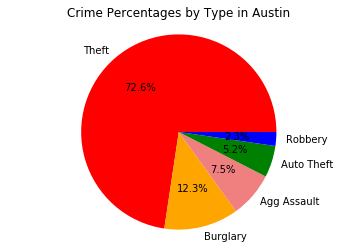

In [101]:
labels = ["Theft", "Burglary", "Agg Assault", "Auto Theft", "Robbery"]

sizes= [666, 113, 69, 48, 21]

colors = ["red", "orange", "lightcoral", "green", "blue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.savefig("total_crime_percentage.png")


plt.title("Crime Percentages by Type in Austin")

In [66]:
#NIBRS/UCR offense by zip code
nibr_zipcode = new_response_df[["Zip Code", "Highest NIBRS/UCR Offense Description"]]
nibr_zipcode.head() 

,Zip Code,Highest NIBRS/UCR Offense Description
0,78724,Auto Theft
1,78701,Agg Assault
2,78753,Theft
3,78753,Theft
4,78744,Theft


In [68]:
#how many total offenses in each zip code
nibr_zipcode_total = nibr_zipcode.groupby("Zip Code").count()
nibr_zipcode_total

,Highest NIBRS/UCR Offense Description
Zip Code,
78613,9
78617,6
78660,4
78701,50
78702,50
78703,14
78704,70
78705,16
78717,10


In [69]:
nibr_zipcode_total["Highest NIBRS/UCR Offense Description"] = pd.to_numeric(nibr_zipcode_total["Highest NIBRS/UCR Offense Description"],errors='coerce')

In [135]:
merged_pop_crime_pd = pd.merge(merged_pd, nibr_zipcode_total, how = 'inner', left_on="Zip Code", right_index=True)
merged_pop_crime_pd

nibr_zipcode_total2 = nibr_zipcode.groupby("Zip Code").count()
nibr_zipcode_total2


,Highest NIBRS/UCR Offense Description
Zip Code,
78613,9
78617,6
78660,4
78701,50
78702,50
78703,14
78704,70
78705,16
78717,10


In [136]:
merged_pop_crime_pd = pd.merge(merged_pd, nibr_zipcode_total, how = 'inner', left_on="Zip Code", right_index=True)
merged_pop_crime_pd

,Zip Code,2017 Est.Population,Latitude,Longitude,2017 Est.Population,Highest NIBRS/UCR Offense Description
0,78702,28681,30.263915,-97.713660,28681,50
1,78703,23331,30.289730,-97.766479,23331,14
2,78704,53492,30.241524,-97.768770,53492,70
3,78717,36048,30.493719,-97.767998,36048,10
4,78721,13012,30.266190,-97.684756,13012,12
5,78722,6642,30.291926,-97.716549,6642,1
6,78723,40230,30.304076,-97.687490,40230,41
7,78724,27369,30.295088,-97.613722,27369,10
8,78726,15135,30.427193,-97.843510,15135,3
9,78727,29594,30.429049,-97.722596,29594,16


In [138]:
zipcode_list = []

for zipcode in nibr_zipcode["Zip Code"]:
    zipcode_list.append(zipcode)
    
zipcode_list

['78724',
 '78701',
 '78753',
 '78753',
 '78744',
 '78701',
 '78701',
 '78751',
 '78751',
 '78750',
 '78751',
 '78717',
 '78751',
 '78723',
 '78719',
 '78660',
 '78759',
 '78723',
 '78723',
 '78757',
 '78723',
 '78744',
 '78704',
 '78660',
 '78749',
 '78759',
 '78704',
 '78702',
 '78723',
 '78753',
 '78704',
 '78745',
 '78748',
 '78701',
 '78613',
 '78758',
 '78745',
 '78741',
 '78723',
 '78704',
 '78731',
 '78745',
 '78759',
 '78745',
 '78750',
 '78741',
 '78759',
 '78745',
 '78759',
 '78753',
 '78703',
 '78701',
 '78748',
 '78741',
 '78748',
 '78704',
 '78741',
 '78702',
 '78723',
 '78748',
 '78744',
 '78741',
 '78753',
 '78748',
 '78704',
 '78721',
 '78749',
 '78742',
 '78723',
 '78704',
 '78746',
 '78731',
 '78717',
 '78730',
 '78748',
 '78741',
 '78721',
 '78704',
 '78759',
 '78701',
 '78759',
 '78751',
 '78745',
 '78753',
 '78702',
 '78741',
 '78752',
 '78741',
 '78745',
 '78741',
 '78704',
 '78750',
 '78754',
 '78702',
 '78723',
 '78744',
 '78752',
 '78744',
 '78727',
 '78756',


In [139]:
#Crime rate, percentage
merged_pop_crime_pd["Crime/Population %"] = merged_pop_crime_pd["Highest NIBRS/UCR Offense Description"]/merged_pop_crime_pd["2017 Est.Population "]*100
merged_pop_crime_pd

,Zip Code,2017 Est.Population,Latitude,Longitude,2017 Est.Population,Highest NIBRS/UCR Offense Description,Crime/Population %
0,78702,28681,30.263915,-97.713660,28681,50,0.174331
1,78703,23331,30.289730,-97.766479,23331,14,0.060006
2,78704,53492,30.241524,-97.768770,53492,70,0.130861
3,78717,36048,30.493719,-97.767998,36048,10,0.027741
4,78721,13012,30.266190,-97.684756,13012,12,0.092223
5,78722,6642,30.291926,-97.716549,6642,1,0.015056
6,78723,40230,30.304076,-97.687490,40230,41,0.101914
7,78724,27369,30.295088,-97.613722,27369,10,0.036538
8,78726,15135,30.427193,-97.843510,15135,3,0.019822
9,78727,29594,30.429049,-97.722596,29594,16,0.054065


In [145]:
merged_pop_crime_pd["Zip Code"]

0     78702
1     78703
2     78704
3     78717
4     78721
5     78722
6     78723
7     78724
8     78726
9     78727
11    78729
12    78730
13    78731
17    78735
20    78739
21    78741
22    78744
23    78745
24    78746
25    78748
26    78749
27    78750
28    78751
29    78752
30    78753
31    78754
32    78757
33    78758
34    78759
Name: Zip Code, dtype: object

In [144]:
percent_list =  [0.174331,
0.060006,
0.130861,
0.027741,
0.092223,
0.015056,
0.101914,
0.054065,
0.038228,
0.009997,
0.048333,
0.028390,
0.019397,
0.109943,
0.050510,
0.089669,
0.059145,
0.066292,
0.035887,
0.056792,
0.169730,
0.146186,
0.137231,
0.079190,
0.142137,
0.126108,
0.109823]

In [148]:
#zipcode list for percentage chart
zipcodes_percent =[
78704,
78717,
78721,
78722,
78723,
78724,
78726,
78727,
78729,
78730,
78731,
78735,
78739,
78741,
78744,
78745,
78746,
78748,
78749,
78750,
78751,
78752,
78753,
78754,
78757,
78758,78759]

<IPython.core.display.Javascript object>


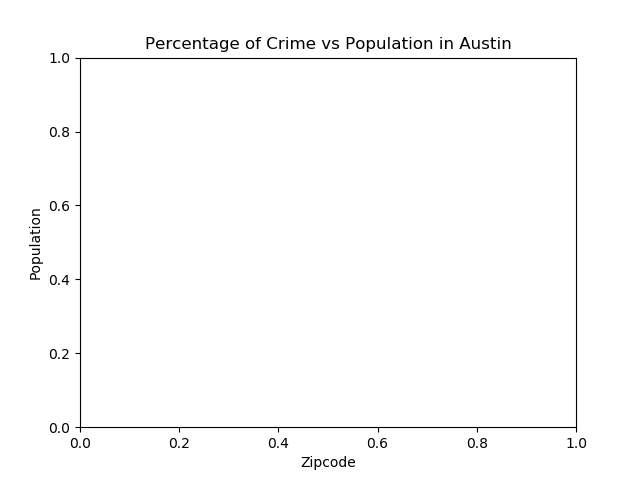

<IPython.core.display.Javascript object>


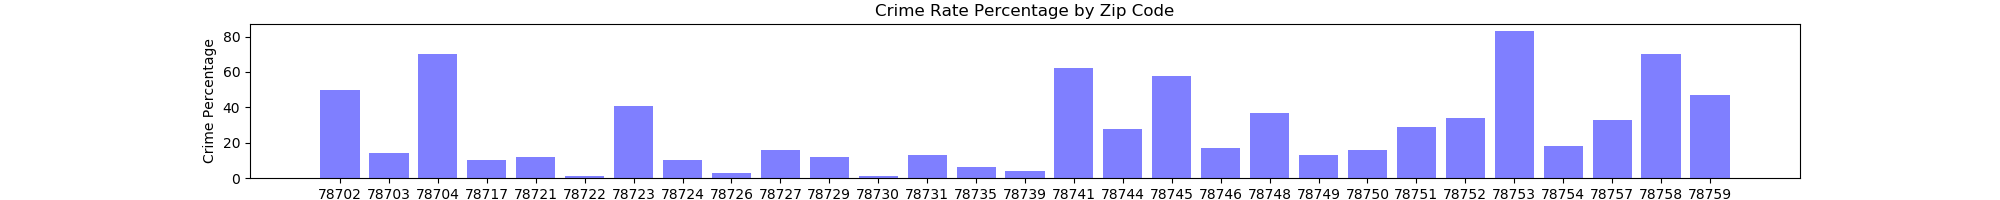

In [158]:
#percent by zipcode
zipcodes_bar = zipcodes_percent
percent_y = percent_list
x_axis = np.arange(0,len(zipcodes_bar))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
   

plt.title("Percentage of Crime vs Population in Austin")
plt.xlabel("Zipcode")
plt.ylabel("Population")

fig = plt.figure(figsize=(20,2))
plt.bar(x_axis,percent_y, facecolor= "red", alpha=0.75, align= "center")

plt.xticks(tick_locations, zipcodes_bar)

plt.savefig("stretched_percent_zipcode.png")

<IPython.core.display.Javascript object>


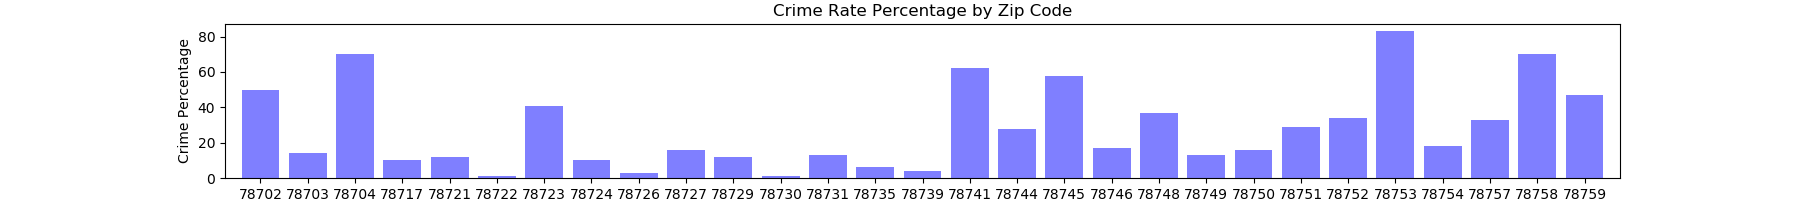

In [163]:
#Bar graph showing crime rate percentage by zipcode
#need to spread out bars
x_axis =merged_pop_crime_pd["Zip Code"]
y_axis = merged_pop_crime_pd["Highest NIBRS/UCR Offense Description"]

fig = plt.figure(figsize=(18,2))

offense_zipcode_plt = plt.bar(x_axis, y_axis, color="blue", alpha=0.5)
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

plt.title("Crime Rate Percentage by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Crime Percentage")
#fig = plt.figure(figsize=(20,2))

plt.xlim(-0.75, len(x_axis)-0.25)

plt.savefig("adjusted_crimepercent.png")

In [80]:
#theft df
second_try = nibr_zipcode.loc[nibr_zipcode["Highest NIBRS/UCR Offense Description"] == "Theft", :]
second_try.head()

,Zip Code,Highest NIBRS/UCR Offense Description
2,78753,Theft
3,78753,Theft
4,78744,Theft
5,78701,Theft
6,78701,Theft


In [81]:
#theft counts
theft_counts= second_try["Zip Code"].value_counts()
theft_counts

78753    60
78704    57
78758    50
78745    46
78701    44
78759    39
78741    35
78702    30
78748    28
78751    26
78723    26
78752    23
78757    23
78746    16
78750    14
78744    14
78727    12
78705    12
78749    11
78754    11
78703    10
78729    10
78721     8
78613     7
78717     7
78731     7
78756     6
78719     5
78724     5
78660     4
78617     3
78725     3
78735     3
78739     3
78747     2
78726     2
78742     2
78730     1
78722     1
Name: Zip Code, dtype: int64

In [82]:
zipcode_list1 = [
 78660,
 78613,
 78617,
 78701,
 78702,
 78703,
 78704,
 78705,
 78717,
 78719,
 78721,
 78722,
 78723,
 78724,
 78725,
 78726,
 78727,
 78729,
 78730,
 78731,
 78735,
 78739,
 78741,
 78742,
 78744,
 78745,
 78746,
 78747,
 78748,
 78749,
 78750,
 78751,
 78752,
 78753,
 78754,
 78757,
 78756,
 78758,
 78759]

In [83]:
theft_counts_list = []
for zipcode in theft_counts:
    theft_counts_list.append(zipcode)
    
theft_counts_list

[60,
 57,
 50,
 46,
 44,
 39,
 35,
 30,
 28,
 26,
 26,
 23,
 23,
 16,
 14,
 14,
 12,
 12,
 11,
 11,
 10,
 10,
 8,
 7,
 7,
 7,
 6,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1]

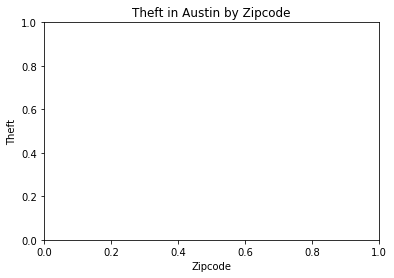

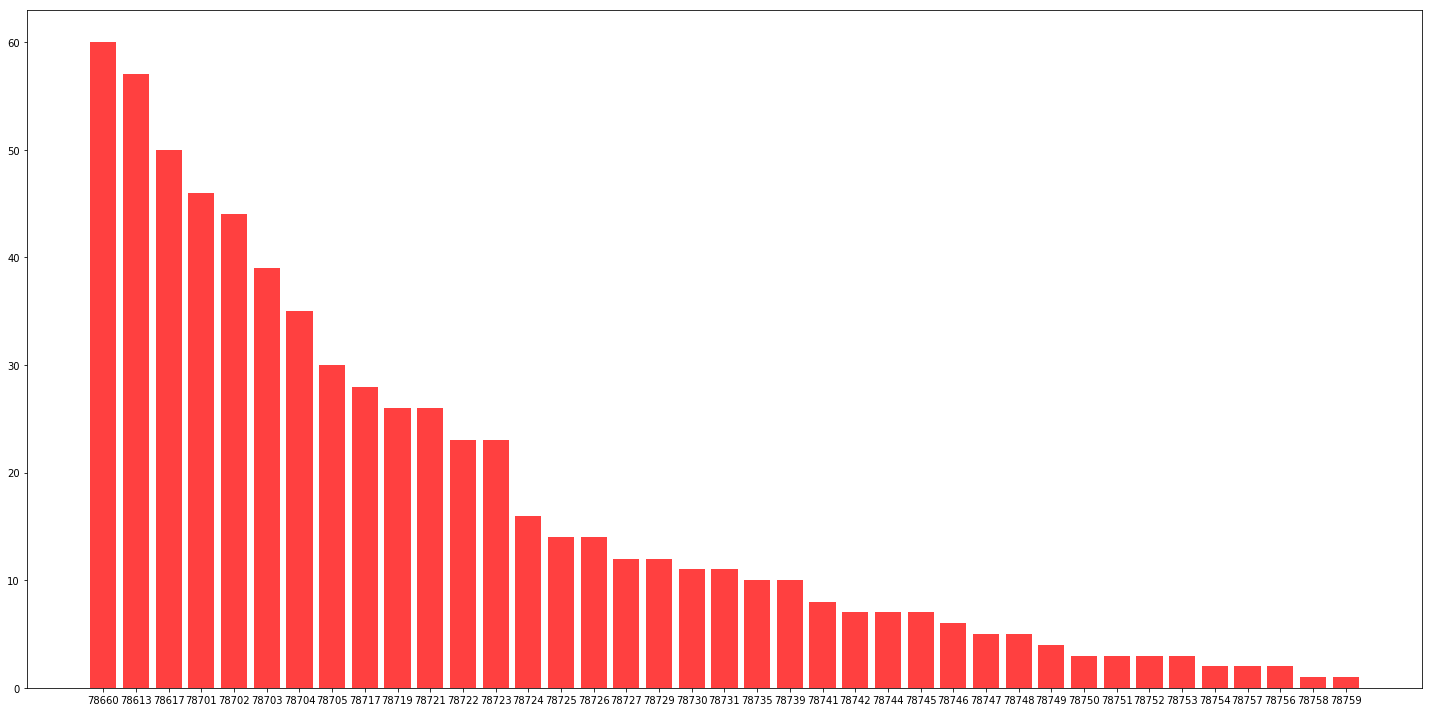

In [118]:
#theft by zipcode
zipcodes_bar = zipcode_list1
thefts_y = theft_counts_list
x_axis = np.arange(0,len(zipcodes_bar))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
   

plt.title("Theft in Austin by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Theft")

fig = plt.figure(figsize=(20,10))
plt.bar(x_axis,thefts_y, facecolor= "red", alpha=0.75, align= "center")

plt.xticks(tick_locations, zipcodes_bar)
plt.tight_layout()
plt.savefig("stretched_theft_zipcode.png")

In [87]:
burglary_try = nibr_zipcode.loc[nibr_zipcode["Highest NIBRS/UCR Offense Description"] == "Burglary", :]
burglary_try.head()


,Zip Code,Highest NIBRS/UCR Offense Description
18,78723,Burglary
19,78757,Burglary
36,78745,Burglary
43,78745,Burglary
46,78759,Burglary


In [88]:
#counts for burglary chart
burglary_counts= burglary_try["Zip Code"].value_counts()
burglary_counts


78753    11
78741    11
78702     9
78704     8
78752     8
78744     8
78757     7
78759     6
78748     5
78731     5
78758     4
78703     4
78745     4
78723     3
78727     3
78754     3
78735     2
78613     2
78705     2
78717     2
78701     1
78749     1
78721     1
78747     1
78756     1
78617     1
Name: Zip Code, dtype: int64

In [89]:
#getting the burglary count in a list we can use
burglary_counts_list = []

for zipcode in burglary_counts:
    burglary_counts_list.append(zipcode)
    
burglary_counts_list

[11,
 11,
 9,
 8,
 8,
 8,
 7,
 6,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [90]:
zipcode_list2 = [
 78617,
 78701,
 78702,
 78704,
 78705,
 78717,
 78721,
 78723,
 78724,
 78729,
 78731,
 78735,
 78741,
 78744,
 78745,
 78750,
 78751,
 78753,
 78754,
 78757,
 78758,
]

In [120]:
#aggrevated assault by zipcode
assault_try = nibr_zipcode.loc[nibr_zipcode["Highest NIBRS/UCR Offense Description"] == "Agg Assault", :]
assault_try.head()

,Zip Code,Highest NIBRS/UCR Offense Description
1,78701,Agg Assault
9,78750,Agg Assault
28,78723,Agg Assault
38,78723,Agg Assault
40,78731,Agg Assault


In [121]:
agg_counts= assault_try["Zip Code"].value_counts()
agg_counts

78741    10
78758     9
78723     7
78753     5
78702     5
78701     4
78724     4
78754     3
78744     3
78721     3
78745     3
78704     3
78705     2
78750     1
78731     1
78751     1
78729     1
78757     1
78617     1
78735     1
78717     1
Name: Zip Code, dtype: int64

In [123]:
#zips for agg assault
zip_code3=[
    78617,
 78701,
 78702,
 78704,
 78705,
 78717,
 78721,
 78723,
 78724,
 78729,
 78731,
 78735,
 78741,
 78744,
 78745,
 78750,
 78751,
 78753,
 78754,
 78757,
 78758,]


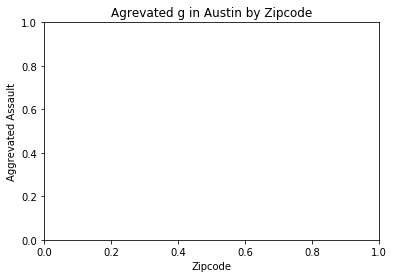

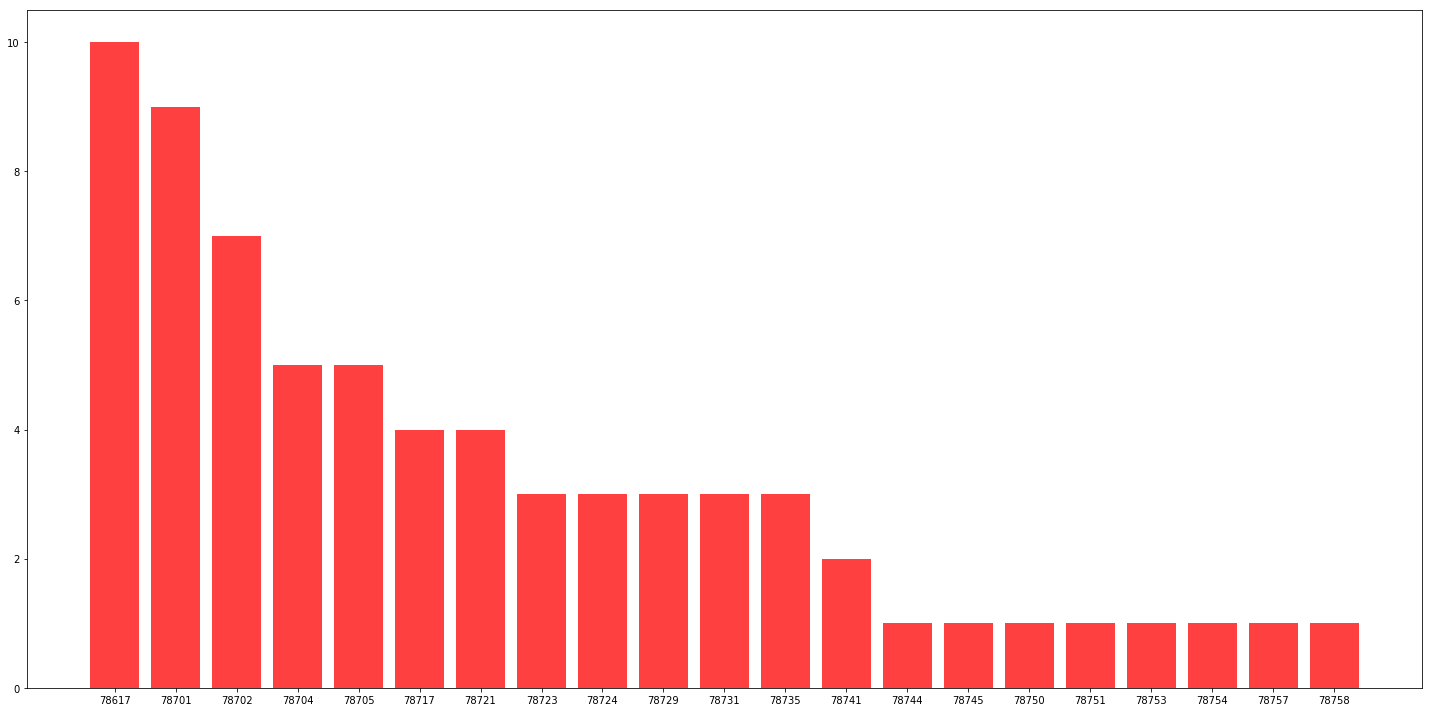

In [128]:
#agg assault by zipcode

zipcodes_bar = zip_code3
agg_y = agg_counts
x_axis = np.arange(0,len(zipcodes_bar))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
   

plt.title("Agrevated g in Austin by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Aggrevated Assault")

fig = plt.figure(figsize=(20,10))
plt.bar(x_axis,agg_y, facecolor= "red", alpha=0.75, align= "center")

plt.xticks(tick_locations, zipcodes_bar)
plt.tight_layout()
plt.savefig("stretched_agg_zipcode.png")

In [119]:
#aggrevated assault by zipcode
agg_assault_byzipcode = nibr_zipcode.loc[nibr_zipcode["Highest NIBRS/UCR Offense Description"]== "Agg Assault"]

#aggrevated assault by zipcode
group_agg_assault = agg_assault_byzipcode.groupby("Zip Code")
print(group_agg_assault)
group_agg_assault.count().head()

,Highest NIBRS/UCR Offense Description
Zip Code,
78617,1
78701,4
78702,5
78704,3
78705,2


In [ ]:
assault_counts= assault_try["Zip Code"].value_counts()
assault_counts

In [ ]:
#robberies by zipcode
robberies_byzipcode = nibr_zipcode.loc[nibr_zipcode["Highest NIBRS/UCR Offense Description"]== "Robbery"]

#list of robbery count by zipcode
group_robbery = robberies_byzipcode.groupby("Zip Code")
print(group_robbery)
group_robbery.count().head()

In [ ]:
group_robbery["Highest NIBRS/UCR Offense Description"]=pd.to_numeric(group_robbery["Highest NIBRS/UCR Offense Description"])

In [ ]:
#how many of each clearance status
clearance_status = new_response_df["Clearance Status"].value_counts()
clearance_status

In [ ]:
#how many offenses by zipcode
zip_codes = new_response_df["Zip Code"].value_counts()
zip_codes